<a href="https://colab.research.google.com/github/andreamurari/percolation_project/blob/main/percolation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from sklearn.cluster import DBSCAN

#FUNZIONI

In [38]:
#FUNZIONE CHE GENERA COORDINATE CON UNA POIS LAMBA * T^2

def generate_poisson_coordinates(T, k):
  # Step 1: Generate N from Poisson distribution
  N = np.random.poisson(k * T**2)
  # Step 2: Check if N is zero and handle termination
  if N == 0:
    return []
  # Step 3: Generate random numbers and scale to coordinates
  else:
    coordinates_x = []
    coordinates_y = []
    for _ in range(N):
      U = np.random.random()
      V = np.random.random()
      coordinates_x.append(U * T)
      coordinates_y.append(V * T)
  #print (f"N = {N} \nCoordinates X = {coordinates_x} \nCoordinates Y = {coordinates_y}")
  return coordinates_x, coordinates_y

In [39]:
#FUNZIONE CHE CREA CLUSTERS
def clusterizza_dbscan(coordinates_x, coordinates_y, eps=1, min_samples=1):
# Combine x and y coordinates into a single NumPy array
  coordinates = np.array(list(zip(coordinates_x, coordinates_y)))

  # Create a DBSCAN instance with specified parameters
  db = DBSCAN(eps=eps, min_samples=min_samples)

  # Fit the model to the data points
  db.fit(coordinates)

  # Extract cluster labels for each point
  cluster_labels = db.labels_

  # Create a list to store clusters (indices of points in each cluster)
  clusters = []
  for i, label in enumerate(cluster_labels):
    # Skip noise points (labeled -1)
    if label == -1:
      continue
    # Find all points with the same label (belonging to the same cluster)
    cluster_indices = [j for j, l in enumerate(cluster_labels) if l == label]
    clusters.append(cluster_indices)

  return clusters

In [40]:
def remove_duplicates(clusters_with_doubles):
  for i in range(len(clusters_with_doubles)):
    for j in range(i+1, len(clusters_with_doubles)):
      if clusters_with_doubles[i] == clusters_with_doubles[j]:
        clusters_with_doubles[j] = "duplicato"
  clusters = []
  for element in clusters_with_doubles:
    if element != "duplicato":
      clusters.append(element)
  return clusters

In [41]:
#FUNZIONE PER SIZE DEL CLUSTER PIU GRANDE
def largest_cluster_size (clusters):
  max_cluster_size = 0
  for cluster in clusters:
    if len(cluster) > max_cluster_size:
      max_cluster_size = len(cluster)
  return max_cluster_size

In [42]:
#FUNZIONE CHE RESTITUISCE IL NUMERO DI CLUSTERS
def number_of_clusters(clusters):
  return len(clusters)

#SVOLGIMENTO

In [43]:
T = 25 #MAX DOMINIO
l = 4.512/(4*math.pi) #LAMBDA
M = 10 #NUMERO ITERAZIONI

In [44]:
coordinates_x, coordinates_y = generate_poisson_coordinates(T, l)

In [45]:
clusters_with_duplicates = clusterizza_dbscan(coordinates_x, coordinates_y)
clusters = remove_duplicates(clusters_with_duplicates)
print(clusters)

[[0], [1], [2, 17, 28, 99, 209], [3, 123], [4, 53, 87, 138, 150], [5, 113], [6, 27], [7], [8, 59, 183], [9], [10], [11, 128, 187], [12], [13, 64], [14, 130, 169, 171, 199], [15, 85, 129, 189, 192, 226], [16, 50, 91, 223], [18, 115, 181], [19, 105, 165], [20], [21, 151], [22], [23, 48, 156], [24, 36, 68, 78, 79], [25], [26, 172], [29], [30, 108], [31], [32, 188, 220], [33], [34], [35, 207], [37, 102, 155, 208], [38, 120], [39], [40, 214], [41, 119], [42], [43], [44, 52, 109, 186, 201], [45, 46, 67], [47], [49], [51], [54], [55, 157], [56], [57, 58, 176, 194], [60], [61], [62, 88, 160, 196], [63, 224], [65, 84], [66, 81, 93, 158], [69], [70, 121], [71], [72, 221], [73], [74], [75], [76, 149], [77], [80, 132, 204], [82, 100], [83], [86], [89], [90], [92], [94, 222, 225], [95], [96, 125], [97, 167], [98], [101, 163], [103, 152, 190], [104], [106], [107], [110], [111], [112, 174], [114, 153], [116, 144, 170], [117], [118], [122], [124], [126], [127, 217], [131], [133], [134, 166], [135], [1

In [46]:
largest_cluster_size(clusters)

6

In [47]:
number_of_clusters(clusters)

129

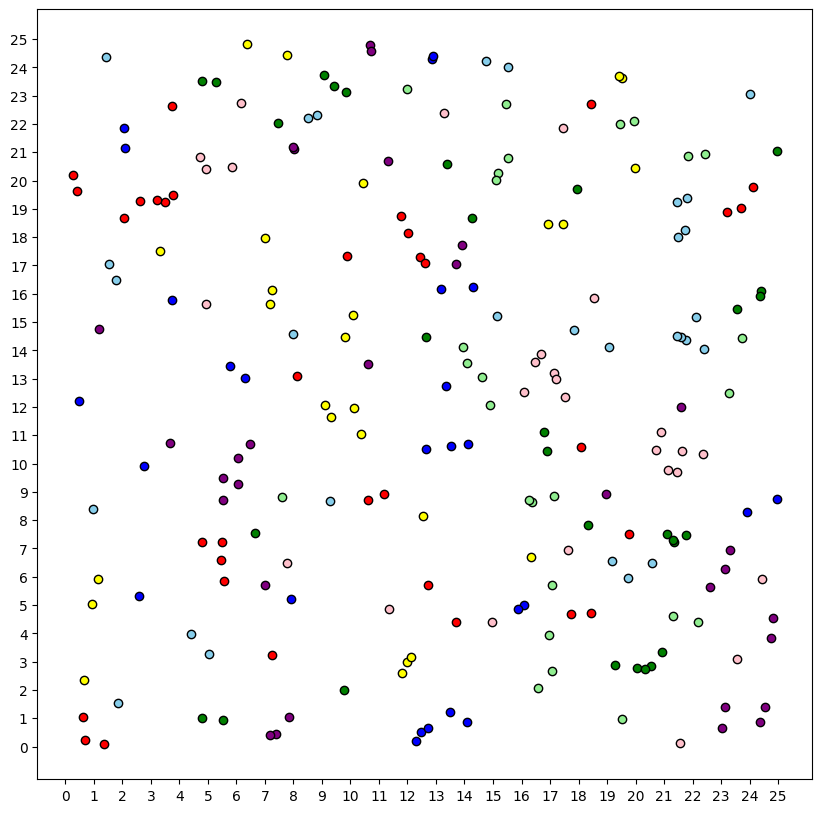

In [48]:
# Create a list to store colors for each cluster
cluster_colors = ['red', 'green', 'blue', 'yellow', 'purple', 'lightgreen', 'skyblue', 'pink']

# Create a scatter plot with points colored by cluster
plt.figure(figsize = (10, 10))
for i, cluster in enumerate(clusters):
  x_values = [coordinates_x[index] for index in cluster]
  y_values = [coordinates_y[index] for index in cluster]
  plt.scatter(x_values, y_values, c=cluster_colors[i % len(cluster_colors)], edgecolors='black')
plt.xticks(range(0, T + 1, 1))
plt.yticks(range(0, T + 1, 1))
plt.show()

In [51]:
for i in range(M):
  coordinates_x, coordinates_y = generate_poisson_coordinates(T, l)
  clusters_with_duplicates = clusterizza_dbscan(coordinates_x, coordinates_y)
  clusters = remove_duplicates(clusters_with_duplicates)
  clusters_with_duplicates = clusterizza_dbscan(coordinates_x, coordinates_y)
  clusters = remove_duplicates(clusters_with_duplicates)
  print ('largest cluster size: ',largest_cluster_size(clusters), '\nnumber of clusters: ',  number_of_clusters(clusters))

largest cluster size:  7 
number of clusters:  126
largest cluster size:  8 
number of clusters:  147
largest cluster size:  6 
number of clusters:  119
largest cluster size:  6 
number of clusters:  126
largest cluster size:  11 
number of clusters:  118
largest cluster size:  9 
number of clusters:  123
largest cluster size:  6 
number of clusters:  124
largest cluster size:  11 
number of clusters:  125
largest cluster size:  11 
number of clusters:  139
largest cluster size:  11 
number of clusters:  134
